<a href="https://colab.research.google.com/github/Gilade98/Machine_Learning_Projects/blob/main/The_DS_Toolbox/Ex4_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox

## Reddit Networks
Using the [Movie Dynamics Networks dataset](https://www.kaggle.com/datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks) select the subreddit of your favorite  movie show. Using the data of the selected movie,
answer the following questions:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets list -s "Movie Dynamics"

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
michaelfire/movie-dynamics-over-15000-movie-social-networks     Movie Dynamics                                       29MB  2021-04-01 13:21:26            474          5  0.625            
shahjhanalam/movie-data-analytics-dataset                       Movie Data Analytics Dataset                         32KB  2023-09-22 05:26:40           2951         56  0.9411765        
harshitstark/real-movies-dataset                                Real Movies Dataset                                 102KB  2024-02-09 14:38:42            735         66  1.0              
umerhaddii/imdb-summer-movies-data                          

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/movie-dynamics
!kaggle datasets files michaelfire/movie-dynamics-over-15000-movie-social-networks

Next Page Token = CfDJ8D29UYyoxK9CvcInYb4_m_sm1yGiY_aBpaLCWcSOsSYNjBR_2Z7EUlgWWWfz0c_2juVD744oPEW4ksDjyFe16gU
name                                                               size  creationDate         
-----------------------------------------------------------------  ----  -------------------  
moviedynamics/1920_The_Penalty.actors.json                         565B  2021-04-01 13:22:00  
moviedynamics/1920_The_Penalty.json                                568B  2021-04-01 13:21:43  
moviedynamics/1920_Way_Down_East.actors.json                        2KB  2021-04-01 13:21:53  
moviedynamics/1920_Way_Down_East.json                               2KB  2021-04-01 13:22:07  
moviedynamics/1921_The_Sheik.actors.json                           762B  2021-04-01 13:22:03  
moviedynamics/1921_The_Sheik.json                                  801B  2021-04-01 13:22:04  
moviedynamics/1922_Beyond_the_Rocks.actors.json                     1KB  2021-04-01 13:21:37  
moviedynamics/1922_Beyond_the_Rocks

In [ ]:
!kaggle datasets download michaelfire/movie-dynamics-over-15000-movie-social-networks -f moviedynamics/1924_Die_Nibelungen_Kriemhild_s_Revenge.actors.json -p ./datasets/movie-dynamics
!unzip ./datasets/movie-dynamics/*.zip  -d ./datasets/movie-dynamics
!ls ./datasets/movie-dynamics

Dataset URL: https://www.kaggle.com/datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks
License(s): unknown
  0% 0.00/4.65k [00:00<?, ?B/s]
100% 4.65k/4.65k [00:00<00:00, 11.6MB/s]
unzip:  cannot find or open ./datasets/movie-dynamics/*.zip, ./datasets/movie-dynamics/*.zip.zip or ./datasets/movie-dynamics/*.zip.ZIP.

No zipfiles found.
1921_The_Sheik.json  1924_Die_Nibelungen_Kriemhild_s_Revenge.actors.json


In [ ]:
!pip install networkx

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

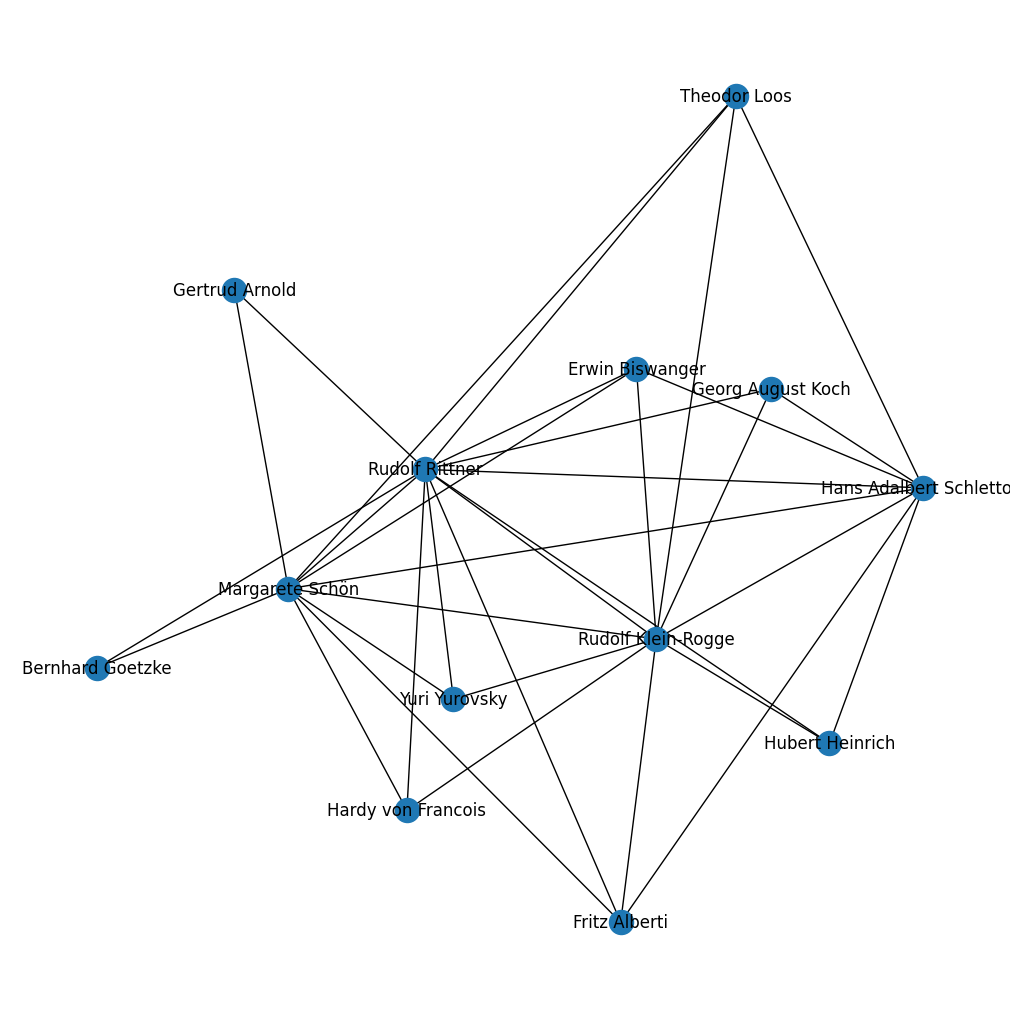

In [ ]:
import networkx as nx
from networkx.readwrite import json_graph
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

j = json.load(open("/content/datasets/movie-dynamics/1924_Die_Nibelungen_Kriemhild_s_Revenge.actors.json"))
g1 = json_graph.node_link_graph(j)
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(g1, with_labels=True)

In [ ]:
d = g1.degree()
list(dict(d).items())[:20]

[('Margarete Schön', 10),
 ('Hans Adalbert Schlettow', 8),
 ('Gertrud Arnold', 2),
 ('Theodor Loos', 4),
 ('Rudolf Klein-Rogge', 10),
 ('Erwin Biswanger', 4),
 ('Rudolf Rittner', 12),
 ('Bernhard Goetzke', 2),
 ('Hardy von Francois', 3),
 ('Yuri Yurovsky', 3),
 ('Hubert Heinrich', 3),
 ('Fritz Alberti', 4),
 ('Georg August Koch', 3)]

<ipython-input-19-58ae8f296918>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([v for v in dict(d).values()])


Text(0, 0.5, 'Density')

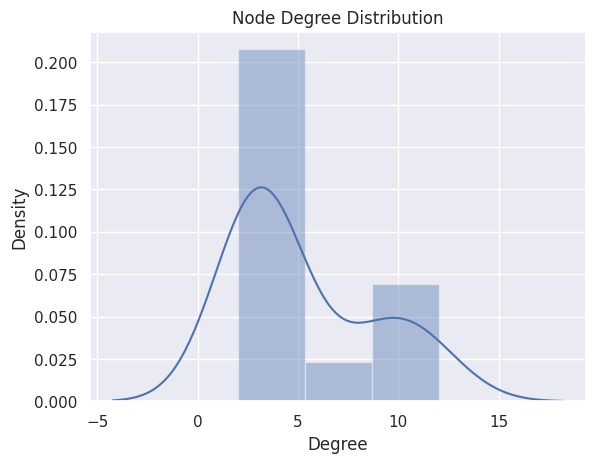

In [ ]:
%matplotlib inline
sns.set()
sns.distplot([v for v in dict(d).values()])
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Density")

**Task 2:** Create a subgraph of the top-12 movie characters according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [ ]:
page_rank = nx.pagerank(g1)
top_12 = sorted(page_rank, key=page_rank.get, reverse=True)[:12]
top_12

['Rudolf Rittner',
 'Margarete Schön',
 'Hans Adalbert Schlettow',
 'Rudolf Klein-Rogge',
 'Theodor Loos',
 'Fritz Alberti',
 'Erwin Biswanger',
 'Hubert Heinrich',
 'Georg August Koch',
 'Hardy von Francois',
 'Yuri Yurovsky',
 'Bernhard Goetzke']

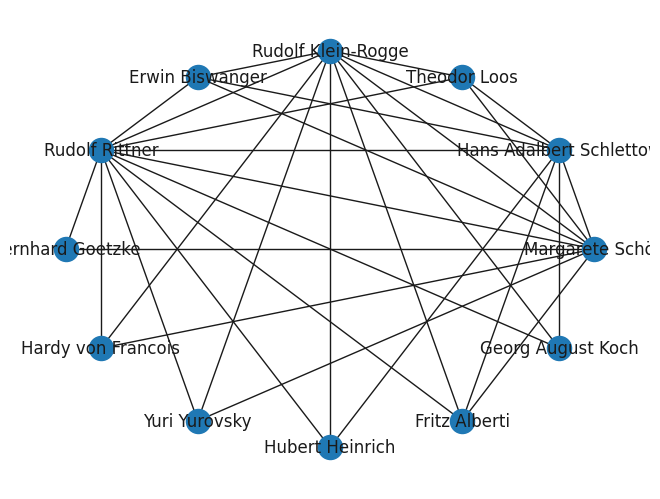

In [ ]:
subgraph = g1.subgraph(top_12)
nx.draw_circular(subgraph, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [ ]:
triangles = nx.triangles(g1)

# 3. Calculate the average shortest path length for each node
average_shortest_path = {}
for node in g1.nodes():
    # Get all shortest path lengths from the node
    path_lengths = nx.single_source_shortest_path_length(g1, node)
    # Compute the average
    avg_length = sum(path_lengths.values()) / len(path_lengths)
    average_shortest_path[node] = avg_length

# Combine results into a summary dictionary
results = {
    node: {
        "PageRank": page_rank[node],
        "Triangles": triangles[node],
        "AvgShortestPath": average_shortest_path[node],
    }
    for node in g1.nodes()
}

# Print results
for node, metrics in results.items():
    print(f"{node}: {metrics}")

Margarete Schön: {'PageRank': 0.1685086167437376, 'Triangles': 18, 'AvgShortestPath': 1.0769230769230769}
Hans Adalbert Schlettow: {'PageRank': 0.14612212793194984, 'Triangles': 16, 'AvgShortestPath': 1.2307692307692308}
Gertrud Arnold: {'PageRank': 0.02454537929071849, 'Triangles': 1, 'AvgShortestPath': 1.6923076923076923}
Theodor Loos: {'PageRank': 0.06131765415632057, 'Triangles': 6, 'AvgShortestPath': 1.5384615384615385}
Rudolf Klein-Rogge: {'PageRank': 0.12570348622297928, 'Triangles': 20, 'AvgShortestPath': 1.0769230769230769}
Erwin Biswanger: {'PageRank': 0.04620532496527864, 'Triangles': 6, 'AvgShortestPath': 1.5384615384615385}
Rudolf Rittner: {'PageRank': 0.22163691685927117, 'Triangles': 22, 'AvgShortestPath': 0.9230769230769231}
Bernhard Goetzke: {'PageRank': 0.02671081521379928, 'Triangles': 1, 'AvgShortestPath': 1.6923076923076923}
Hardy von Francois: {'PageRank': 0.031223398591171382, 'Triangles': 3, 'AvgShortestPath': 1.6153846153846154}
Yuri Yurovsky: {'PageRank': 0.03

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [ ]:
nx.write_gexf(g1, "/content/datasets/movie-dynamics/Die_Nibelungen_Kriemhild.gexf")

degrees = dict(g1.degree())

# Add degree as a node attribute
nx.set_node_attributes(g1, degrees, "degree")

# Save the updated graph
nx.write_gexf(g1, "/content/datasets/movie-dynamics/Die_Nibelungen_Kriemhild_with_degree.gexf")
nx.write_gexf(g1, "/content/datasets/movie-dynamics/Die_Nibelungen_Kriemhild_with_degree.graphml")

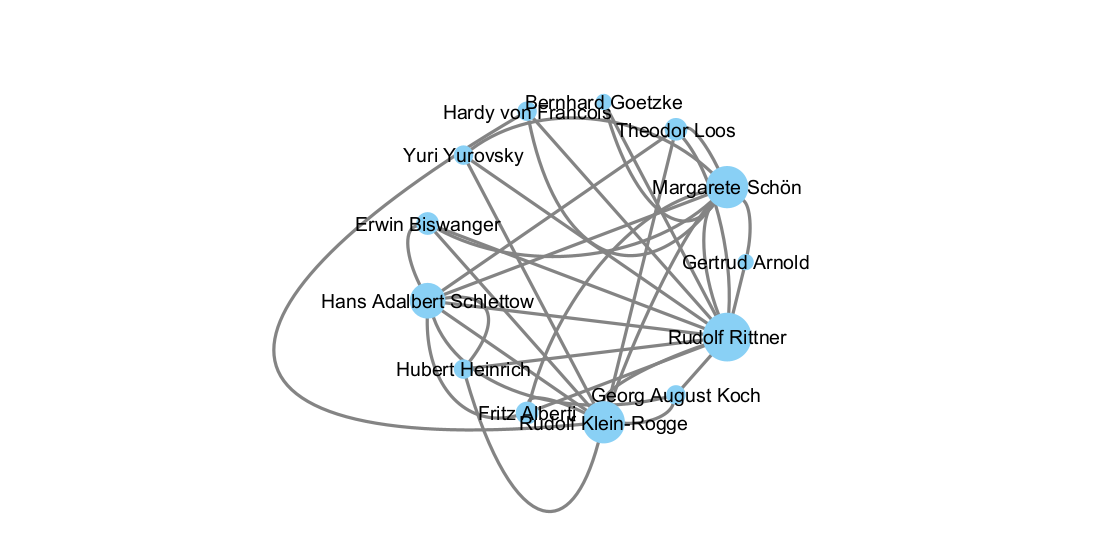

In [ ]:
from IPython.display import Image, display

# Display the image
display(Image(filename="/content/datasets/movie-dynamics/Die_Nibelungen_Kriemhild_with_degree.gexf.png"))

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

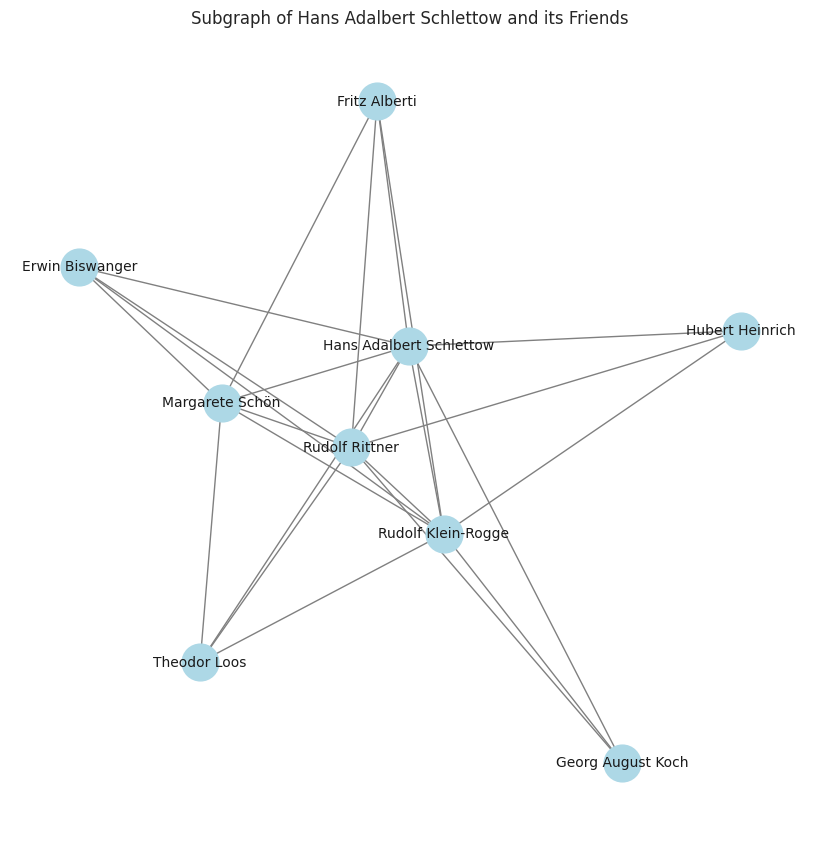

{'Number of Vertices': 9, 'Number of Edges': 24}

In [ ]:
def create_subgraph(graph, vertex):
    if vertex not in graph:
        raise ValueError(f"Vertex {vertex} is not in the graph.")

    # Find neighbors (in and out friends for directed graphs)
    neighbors = set(graph.neighbors(vertex))  # Out neighbors

    # Include the selected vertex in the subgraph
    subgraph_nodes = neighbors.union({vertex})

    # Create the subgraph
    subgraph = graph.subgraph(subgraph_nodes)

    # Draw the subgraph
    pos = nx.spring_layout(subgraph)
    plt.figure(figsize=(8, 8))
    nx.draw(
        subgraph,
        pos,
        with_labels=True,
        node_size=700,
        node_color="lightblue",
        edge_color="gray",
        font_size=10,
    )
    plt.title(f"Subgraph of {vertex} and its Friends")
    plt.show()

    # Calculate the number of vertices and edges
    num_vertices = subgraph.number_of_nodes()
    num_edges = subgraph.number_of_edges()

    return {
        "Number of Vertices": num_vertices,
        "Number of Edges": num_edges
    }

create_subgraph(g1, "Hans Adalbert Schlettow")

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges (Tip: use SGraph or use Vaex and generate a subgraph and use igraph)

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/chess-network
!wget -O ./datasets/chess-network/fcis.tar.gz "https://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz"

--2024-12-06 11:17:43--  https://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.117, 2607:4000:200:12:3eec:efff:fe5e:6f68
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/chess-network/fcis.tar.gz’

./datasets/chess-ne 100%[===================>]   6.38G  71.0MB/s    in 78s     

2024-12-06 11:19:01 (83.6 MB/s) - ‘./datasets/chess-network/fcis.tar.gz’ saved [6852261483/6852261483]



In [ ]:
!tar -xvzf ./datasets/chess-network/fcis.tar.gz -C ./datasets/chess-network/

./FCIS/
./FCIS/fcis_chess.interactions.sframe/
./FCIS/fcis_chess.interactions.sframe/m_a95cbd3153fbdda5.sidx
./FCIS/fcis_chess.interactions.sframe/dir_archive.ini
./FCIS/fcis_chess.interactions.sframe/objects.bin
./FCIS/fcis_chess.interactions.sframe/m_a95cbd3153fbdda5.0000
./FCIS/fcis_chess.interactions.sframe/m_a95cbd3153fbdda5.frame_idx
./FCIS/fcis_chess.vertices.csv
./FCIS/fcis_chess.interactions.csv
./FCIS/fcis_chess.vertices.sframe/
./FCIS/fcis_chess.vertices.sframe/m_c12c4e80284628ce.0000
./FCIS/fcis_chess.vertices.sframe/m_c12c4e80284628ce.frame_idx
./FCIS/fcis_chess.vertices.sframe/m_c12c4e80284628ce.sidx
./FCIS/fcis_chess.vertices.sframe/dir_archive.ini
./FCIS/fcis_chess.vertices.sframe/objects.bin


In [ ]:
!pip install vaex

In [ ]:
import vaex

edges_df = vaex.open("/content/datasets/chess-network/FCIS/fcis_chess.interactions.csv")

edges_df.head()

#,datetime,src_id,dst_id
0,19990101T031300,ranger,game
1,19990101T031300,game,ranger
2,19990101T125100,jovanka,abpdoc
3,19990101T125100,abpdoc,jovanka
4,19990102T071500,Pepo,HugoPrat
5,19990102T071500,HugoPrat,Pepo
6,19990102T204500,Alby,Zaza
7,19990102T204500,Zaza,Alby
8,19990103T084600,varg,chirpy
9,19990103T084600,chirpy,varg


In [ ]:
vertices_df = vaex.open("/content/datasets/chess-network/FCIS/fcis_chess.vertices.csv")
vertices_df.head()

#,mindate,v_id,maxdate
0,19990101T031300,ranger,20140729T013000
1,19990101T031300,game,19991230T235800
2,19990101T125100,abpdoc,20131105T025300
3,19990101T125100,jovanka,20050513T195000
4,19990102T071500,HugoPrat,20010625T081800
5,19990102T071500,Pepo,20141222T171500
6,19990102T204500,Alby,20151218T190800
7,19990102T204500,Zaza,20031105T064000
8,19990103T084600,chirpy,20150705T023500
9,19990103T084600,varg,20140613T222000


In [ ]:
!pip install igraph

In [ ]:
!pip install tqdm

In [ ]:
#Using only a part of the graph since it is too large for google colab
out_degree = edges_df.groupby('src_id', agg={'out_degree': 'count'})

# Merge degrees with edges
edges_df = edges_df.join(out_degree, left_on='src_id', right_on='src_id', how='left')

# Filter edges where either node has high degree
degree_threshold = 100
filtered_edges = edges_df[
    (edges_df['out_degree'] > degree_threshold)
]

# Limit to 10M edges
filtered_edges = filtered_edges[:10_000_000]
filtered_edges.head()

#,datetime,src_id,dst_id,out_degree
0,19990101T031300,ranger,game,21621
1,19990101T125100,jovanka,abpdoc,4165
2,19990101T125100,abpdoc,jovanka,3851
3,19990102T071500,Pepo,HugoPrat,11115
4,19990102T071500,HugoPrat,Pepo,696
5,19990102T204500,Alby,Zaza,28947
6,19990102T204500,Zaza,Alby,3608
7,19990103T084600,varg,chirpy,21374
8,19990103T084600,chirpy,varg,3581
9,19990103T094100,gaj,SinPiedad,81490


In [ ]:
from igraph import Graph
from tqdm import tqdm
import numpy as np

graph = Graph(directed=False)
unique_vertices = set(filtered_edges['src_id'].values).union(set(filtered_edges['dst_id'].values))
unique_vertices

{<pyarrow.StringScalar: 'GavGav'>,
 <pyarrow.StringScalar: 'intasmafyasi'>,
 <pyarrow.StringScalar: 'IQUT'>,
 <pyarrow.StringScalar: 'KeshiaWin'>,
 <pyarrow.StringScalar: 'WingSmurf'>,
 <pyarrow.StringScalar: 'osmax'>,
 <pyarrow.StringScalar: 'abloomston'>,
 <pyarrow.StringScalar: 'ahimsa'>,
 <pyarrow.StringScalar: 'vntvv'>,
 <pyarrow.StringScalar: 'cvbnm'>,
 <pyarrow.StringScalar: 'mcsimon'>,
 <pyarrow.StringScalar: 'seshadri'>,
 <pyarrow.StringScalar: 'SuperBlue'>,
 <pyarrow.StringScalar: 'Sizeboli'>,
 <pyarrow.StringScalar: 'Philosopher'>,
 <pyarrow.StringScalar: 'gcd'>,
 <pyarrow.StringScalar: 'Rozafa'>,
 <pyarrow.StringScalar: 'mikie'>,
 <pyarrow.StringScalar: 'Psycho'>,
 <pyarrow.StringScalar: 'bobyor'>,
 <pyarrow.StringScalar: 'DoctorChessMD'>,
 <pyarrow.StringScalar: 'molskinner'>,
 <pyarrow.StringScalar: 'Kalzar'>,
 <pyarrow.StringScalar: 'dankratz'>,
 <pyarrow.StringScalar: 'Grydian'>,
 <pyarrow.StringScalar: 'Astoroth'>,
 <pyarrow.StringScalar: 'GMBlaster'>,
 <pyarrow.String

In [ ]:
vertex_names = [v.as_py() for v in unique_vertices]
graph.add_vertices(len(vertex_names))
graph.vs["name"] = vertex_names
edges = list(zip(filtered_edges['src_id'].tolist(), filtered_edges['dst_id'].tolist()))
graph.add_edges(edges)

graph.summary()

'IGRAPH UN-- 29928 10000000 -- \n+ attr: name (v)'

In [ ]:
degree_centrality = graph.degree()

# Find the top-10 nodes by degree centrality
top_10_nodes = sorted(
    enumerate(degree_centrality), key=lambda x: x[1], reverse=True
)[:10]

# Extract IDs and centrality values
top_10_ids = [graph.vs[node[0]]["name"] for node in top_10_nodes]
top_10_ids

['Wronskian',
 'FriarTuck',
 'secone',
 'stupido',
 'mscp',
 'flak',
 'fake',
 'rusalka',
 'MrZeppi',
 'GFcrafty']

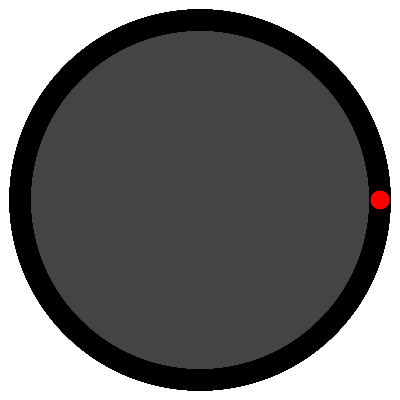

In [ ]:
import igraph as ig
from PIL import Image
from IPython.display import display

# Use only the largest connected component
components = graph.connected_components()
subgraph = components.giant()

layout = subgraph.layout("circle")


plot = ig.plot(
    subgraph,
    layout=layout,
    bbox=(400, 400),
    margin=20,
    vertex_label=None
)
plot.save("optimized_graph_plot.png")

# Display the image
image = Image.open("optimized_graph_plot.png")
display(image)


**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

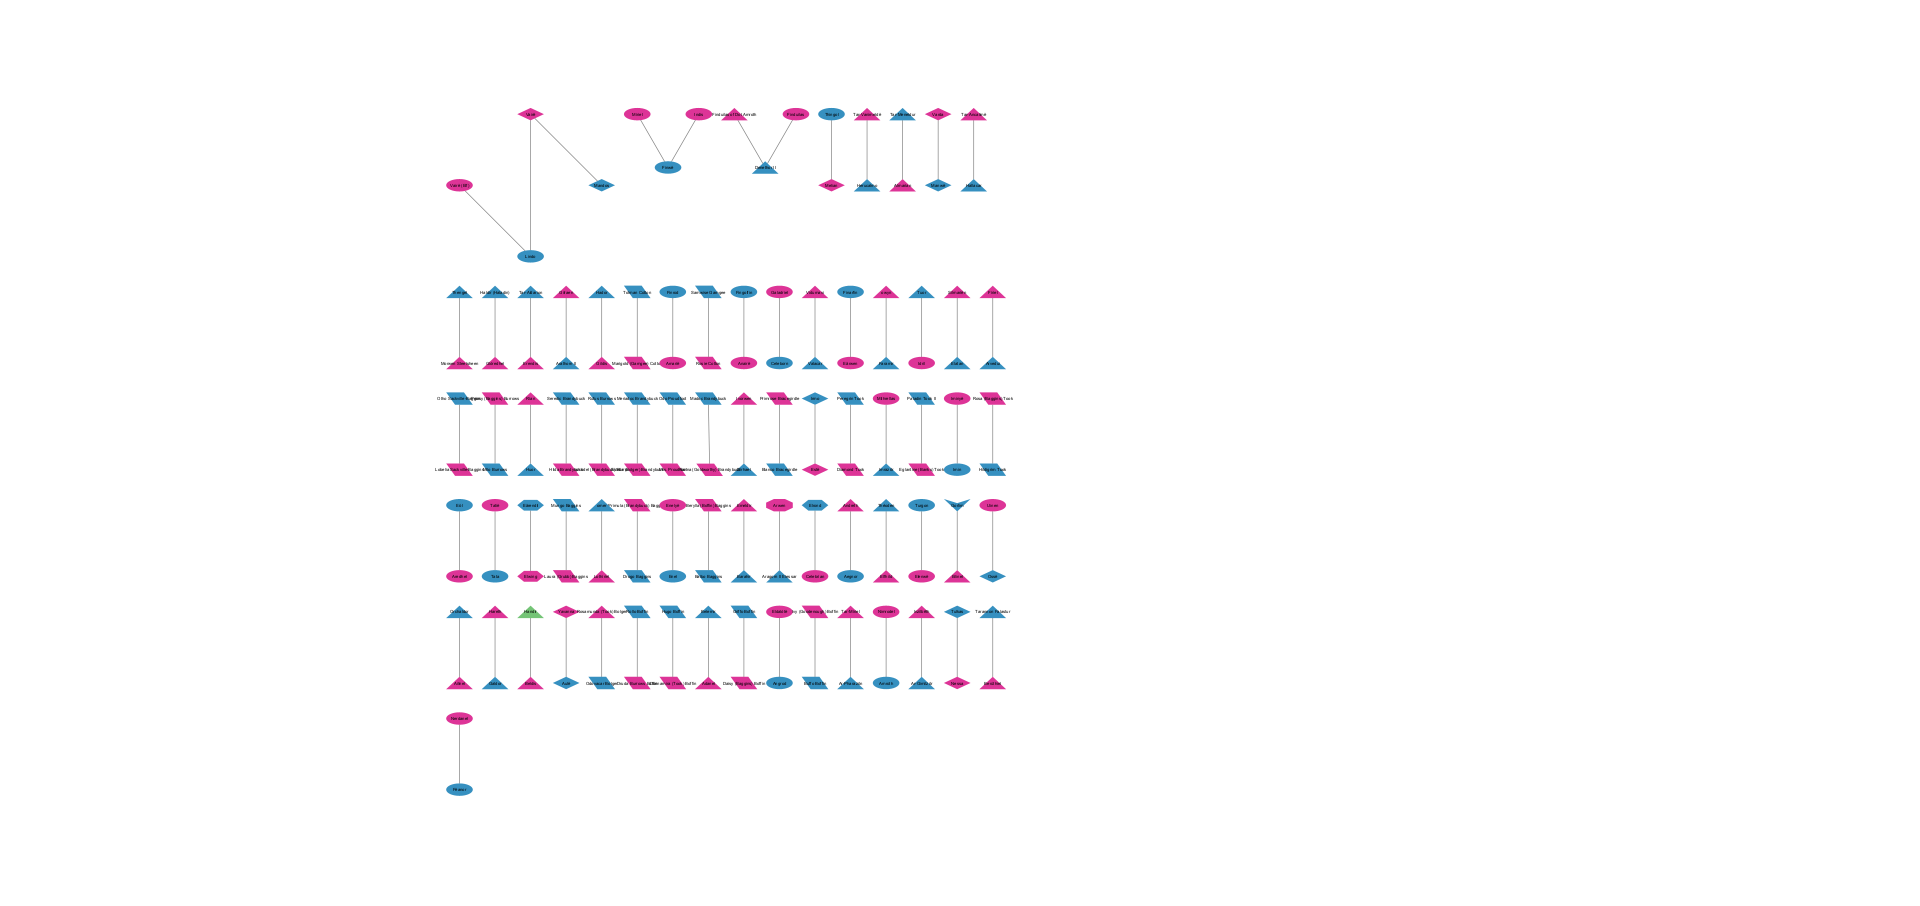

In [ ]:
from IPython.display import Image, display

# Display the image
display(Image(filename="/content/lotr_network_full22.gexf.png"))

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges